<a href="https://colab.research.google.com/github/avisheknag17/public_ml_models/blob/master/time_series_SARIMAX_stock_change_forecasting/time_series_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/public_ml_models/time_series_SARIMAX/dow_jones_index.data")
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


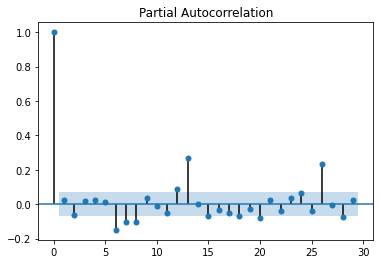

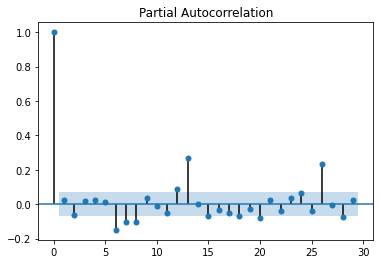

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_pacf(df['percent_change_next_weeks_price'])

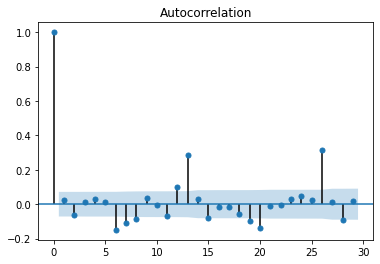

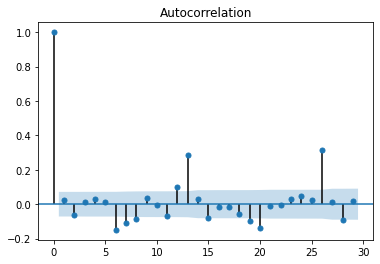

In [ ]:
tsa_plots.plot_acf(df['percent_change_next_weeks_price'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


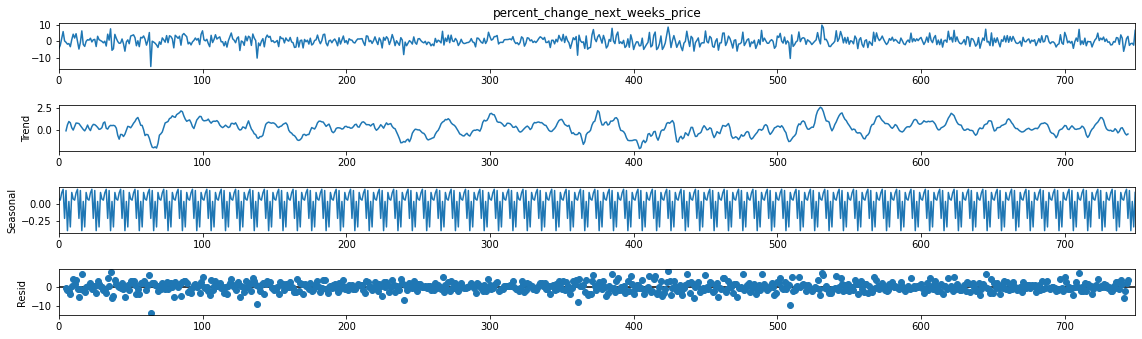

In [ ]:
import statsmodels.tsa.seasonal as seasonal
import matplotlib.pyplot as plt

fig = seasonal.seasonal_decompose(df['percent_change_next_weeks_price'], freq=10, model='additive').plot()
fig.set_figheight(5)
fig.set_figwidth(18)
plt.show()


In [ ]:
import statsmodels.tsa.stattools as tools

p_value = tools.adfuller(df['percent_change_next_weeks_price'], regression='nc')[1]
print('p-value: {}'.format(p_value))

p-value: 2.20444489433296e-08


In [ ]:
import pandas as pd

df_transformed = pd.get_dummies(df, columns=['stock'])
df_transformed = df_transformed.drop(columns=['date'], axis=1)
df_transformed['open'] = df_transformed['open'].str.replace('$','')
df_transformed['high'] = df_transformed['high'].str.replace('$','')
df_transformed['low'] = df_transformed['low'].str.replace('$','')
df_transformed['close'] = df_transformed['close'].str.replace('$','')
df_transformed['next_weeks_open'] = df_transformed['next_weeks_open'].str.replace('$','')
df_transformed['next_weeks_close'] = df_transformed['next_weeks_close'].str.replace('$','')
df_transformed = df_transformed.fillna(0)
df_transformed.head()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,stock_AA,stock_AXP,stock_BA,stock_BAC,stock_CAT,stock_CSCO,stock_CVX,stock_DD,stock_DIS,stock_GE,stock_HD,stock_HPQ,stock_IBM,stock_INTC,stock_JNJ,stock_JPM,stock_KO,stock_KRFT,stock_MCD,stock_MMM,stock_MRK,stock_MSFT,stock_PFE,stock_PG,stock_T,stock_TRV,stock_UTX,stock_VZ,stock_WMT,stock_XOM
0,1,15.82,16.72,15.78,16.42,239655616,3.79267,0.000000,0.0,16.71,15.97,-4.428490,26,0.182704,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_transformed.drop(columns=['percent_change_next_weeks_price'], axis=1)
Y = df_transformed['percent_change_next_weeks_price']

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit()
for train_index, test_index in tss.split(X,Y):
  Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index] 
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]

In [ ]:
from pmdarima.arima import auto_arima

auto_model = auto_arima(Y_train.to_numpy(), exogenous=X_train.to_numpy(), m=2, seasonal=True, suppress_warnings = True,  step_wise=True, trace=True)           
auto_model.summary()

Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1886: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(1,0,1)[2] intercept   : AIC=2335.613, Time=3.77 sec
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=2347.023, Time=2.99 sec
 ARIMA(1,0,0)(1,0,0)[2] intercept   : AIC=2347.183, Time=3.71 sec
 ARIMA(0,0,1)(0,0,1)[2] intercept   : AIC=2345.588, Time=3.67 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=5744.617, Time=2.57 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1886: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,1)[2] intercept   : AIC=2348.054, Time=3.57 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1886: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(1,0,0)[2] intercept   : AIC=2349.633, Time=3.53 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1886: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,0,1)[2] intercept   : AIC=2329.367, Time=4.20 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1886: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,0,0)[2] intercept   : AIC=2339.767, Time=4.06 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1886: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,0,2)[2] intercept   : AIC=2333.392, Time=4.92 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1886: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(1,0,2)[2] intercept   : AIC=2331.400, Time=4.86 sec
 ARIMA(0,0,1)(2,0,1)[2] intercept   : AIC=2327.233, Time=3.65 sec
 ARIMA(0,0,1)(1,0,1)[2] intercept   : AIC=2333.592, Time=3.59 sec
 ARIMA(0,0,1)(2,0,0)[2] intercept   : AIC=2337.258, Time=3.54 sec
 ARIMA(0,0,1)(2,0,2)[2] intercept   : AIC=2331.110, Time=4.82 sec
 ARIMA(0,0,1)(1,0,0)[2] intercept   : AIC=2347.229, Time=3.20 sec
 ARIMA(0,0,1)(1,0,2)[2] intercept   : AIC=2329.128, Time=4.71 sec
 ARIMA(0,0,0)(2,0,1)[2] intercept   : AIC=2325.812, Time=3.60 sec
 ARIMA(0,0,0)(1,0,1)[2] intercept   : AIC=2331.289, Time=3.43 sec
 ARIMA(0,0,0)(2,0,0)[2] intercept   : AIC=2335.852, Time=3.44 sec
 ARIMA(0,0,0)(2,0,2)[2] intercept   : AIC=2329.855, Time=4.16 sec
 ARIMA(0,0,0)(1,0,0)[2] intercept   : AIC=2345.240, Time=3.05 sec
 ARIMA(0,0,0)(1,0,2)[2] intercept   : AIC=2327.859, Time=4.06 sec
 ARIMA(1,0,0)(2,0,1)[2] intercept   : AIC=2327.627, Time=4.12 sec
 ARIMA(0,0,0)(2,0,1)[2]             : AIC=2323.272, Time=3.46 sec
 ARIMA(0,0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1886: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  625
Model:             SARIMAX(2, 0, [1], 2)   Log Likelihood               -1114.636
Date:                   Mon, 14 Sep 2020   AIC                           2323.272
Time:                           07:00:06   BIC                           2531.846
Sample:                                0   HQIC                          2404.317
                                   - 625                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0131   7.01e-06  -1872.589      0.000      -0.013      -0.013
x2             0.0595      0.000    479.222      0.000       0.059       0.060
x3            -0.0462      0.000   -362.696      0.000      -0.046      -0.046
x4             0.0885      0.000    710.584      0.000       0.088       0.089
x5            -0.0417      0.000   -332.643      0.000      -0.042      -0.041
x6          4.159e-09   3.78e-10     11.012      0.000    3.42e-09     4.9e-09
x7             0.0419    4.5e-05    931.632      0.000       0.042       0.042
x8            -0.0005      0.002     -0.286      0.775      -0.004       0.003
x9         -8.126e-10   3.71e-10     -2.192      0.028   -1.54e-09   -8.61e-11
x10           -1.3847      0.000   -1.1e+04      0.000      -1.385      -1.384
x11            1.4372      0.000   1.08e+04      0.000       1.437       1.438
x12           -0.0007      0.001     -0.772      0.440      -0.002       0.001
x13            9.9183   5.11e-06   1.94e+06      0.000       9.918       9.918
x14           -4.0862   2.26e-06  -1.81e+06      0.000      -4.086      -4.086
x15           -8.7681   6.35e-07  -1.38e+07      0.000      -8.768      -8.768
x16          -13.7366   9.35e-07  -1.47e+07      0.000     -13.737     -13.737
x17           -5.2559   2.84e-06  -1.85e+06      0.000      -5.256      -5.256
x18          -15.7420   3.24e-07  -4.86e+07      0.000     -15.742     -15.742
x19           -7.1785   1.92e-06  -3.73e+06      0.000      -7.178      -7.178
x20          -18.5105   7.78e-07  -2.38e+07      0.000     -18.510     -18.510
x21          -13.3521   5.24e-07  -2.55e+07      0.000     -13.352     -13.352
x22          -14.0097   2.57e-06  -5.44e+06      0.000     -14.010     -14.010
x23          -10.0344   1.31e-06  -7.68e+06      0.000     -10.034     -10.034
x24          -10.7137   3.05e-07  -3.52e+07      0.000     -10.714     -10.714
x25           -7.6351   5.14e-07  -1.48e+07      0.000      -7.635      -7.635
x26          -23.4162   1.95e-06   -1.2e+07      0.000     -23.416     -23.416
x27          -11.7072   2.93e-07     -4e+07      0.000     -11.707     -11.707
x28          -15.9112   7.13e-08  -2.23e+08      0.000     -15.911     -15.911
x29          -10.8634   2.19e-07  -4.95e+07      0.000     -10.863     -10.863
x30          -14.4018   2.81e-08  -5.12e+08      0.000     -14.402     -14.402
x31          -12.1397   5.23e-07  -2.32e+07      0.000     -12.140     -12.140
x32          -16.5241   8.27e-08     -2e+08      0.000     -16.524     -16.524
x33          -16.1818    6.2e-07  -2.61e+07      0.000     -16.182     -16.182
x34          -15.1826   7.82e-07  -1.94e+07      0.000     -15.183     -15.183
x35          -10.3344   4.46e-07  -2.32e+07      0.000     -10.334     -10.334
x36          -12.6181    1.5e-06   -8.4e+06      0.000     -12.618     -12.618
x37          -15.3383   1.22e-07  -1.26e+08      0.000     -15.338     -15.338
x38          -18.4192   1.98e-07   -9.3e+07      0.000

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(endog=Y_train.to_numpy(), exog=X_train.to_numpy().astype(float), order=(0, 0, 0),seasonal_order=(2, 0, 1, 2))
model = model.fit(disp=False)
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  625
Model:             SARIMAX(2, 0, [1], 2)   Log Likelihood               -1114.636
Date:                   Mon, 14 Sep 2020   AIC                           2323.272
Time:                           07:00:10   BIC                           2531.846
Sample:                                0   HQIC                          2404.317
                                   - 625                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0131   7.01e-06  -1872.589      0.000      -0.013      -0.013
x2             0.0595      0.000    479.222      0.000       0.059       0.060
x3            -0.0462      0.000   -362.696      0.000      -0.046      -0.046
x4             0.0885      0.000    710.584      0.000       0.088       0.089
x5            -0.0417      0.000   -332.643      0.000      -0.042      -0.041
x6          4.159e-09   3.78e-10     11.012      0.000    3.42e-09     4.9e-09
x7             0.0419    4.5e-05    931.632      0.000       0.042       0.042
x8            -0.0005      0.002     -0.286      0.775      -0.004       0.003
x9         -8.126e-10   3.71e-10     -2.192      0.028   -1.54e-09   -8.61e-11
x10           -1.3847      0.000   -1.1e+04      0.000      -1.385      -1.384
x11            1.4372      0.000   1.08e+04      0.000       1.437       1.438
x12           -0.0007      0.001     -0.772      0.440      -0.002       0.001
x13            9.9183   5.11e-06   1.94e+06      0.000       9.918       9.918
x14           -4.0862   2.26e-06  -1.81e+06      0.000      -4.086      -4.086
x15           -8.7681   6.35e-07  -1.38e+07      0.000      -8.768      -8.768
x16          -13.7366   9.35e-07  -1.47e+07      0.000     -13.737     -13.737
x17           -5.2559   2.84e-06  -1.85e+06      0.000      -5.256      -5.256
x18          -15.7420   3.24e-07  -4.86e+07      0.000     -15.742     -15.742
x19           -7.1785   1.92e-06  -3.73e+06      0.000      -7.178      -7.178
x20          -18.5105   7.78e-07  -2.38e+07      0.000     -18.510     -18.510
x21          -13.3521   5.24e-07  -2.55e+07      0.000     -13.352     -13.352
x22          -14.0097   2.57e-06  -5.44e+06      0.000     -14.010     -14.010
x23          -10.0344   1.31e-06  -7.68e+06      0.000     -10.034     -10.034
x24          -10.7137   3.05e-07  -3.52e+07      0.000     -10.714     -10.714
x25           -7.6351   5.14e-07  -1.48e+07      0.000      -7.635      -7.635
x26          -23.4162   1.95e-06   -1.2e+07      0.000     -23.416     -23.416
x27          -11.7072   2.93e-07     -4e+07      0.000     -11.707     -11.707
x28          -15.9112   7.13e-08  -2.23e+08      0.000     -15.911     -15.911
x29          -10.8634   2.19e-07  -4.95e+07      0.000     -10.863     -10.863
x30          -14.4018   2.81e-08  -5.12e+08      0.000     -14.402     -14.402
x31          -12.1397   5.23e-07  -2.32e+07      0.000     -12.140     -12.140
x32          -16.5241   8.27e-08     -2e+08      0.000     -16.524     -16.524
x33          -16.1818    6.2e-07  -2.61e+07      0.000     -16.182     -16.182
x34          -15.1826   7.82e-07  -1.94e+07      0.000     -15.183     -15.183
x35          -10.3344   4.46e-07  -2.32e+07      0.000     -10.334     -10.334
x36          -12.6181    1.5e-06   -8.4e+06      0.000     -12.618     -12.618
x37          -15.3383   1.22e-07  -1.26e+08      0.000     -15.338     -15.338
x38          -18.4192   1.98e-07   -9.3e+07      0.000

In [ ]:
result = model.predict(start=1, end=125, exog=X_test.to_numpy().astype(float))

In [ ]:
len(X_test), len(Y_test), len(result), len(X_train)

(125, 125, 125, 625)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(result, Y_test)

9.302231888223911

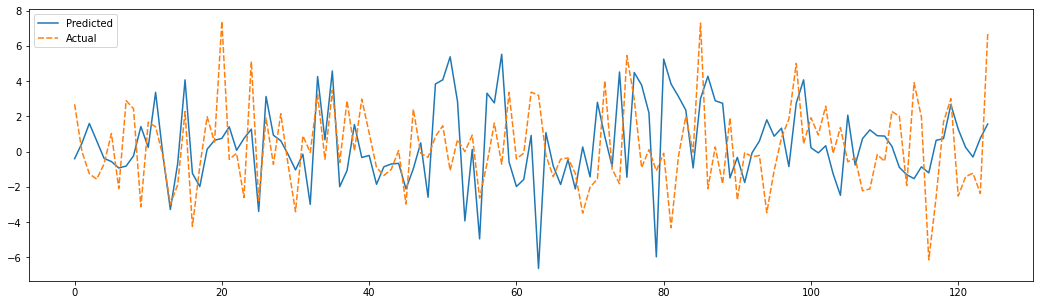

In [ ]:
import seaborn as sns

plt.figure(figsize=(18,5))
sns.lineplot(data=pd.DataFrame({'Predicted':result,'Actual':Y_test.to_numpy()}))

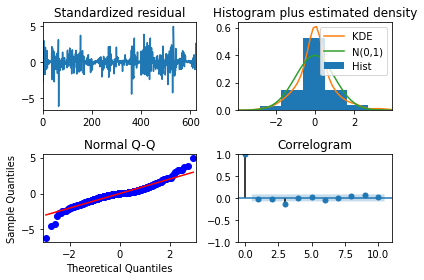

In [ ]:
model.plot_diagnostics()
plt.tight_layout()
plt.show()